In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tips-dataset/__results__.html
/kaggle/input/tips-dataset/__resultx__.html
/kaggle/input/tips-dataset/__notebook__.ipynb
/kaggle/input/tips-dataset/__output__.json
/kaggle/input/tips-dataset/custom.css
/kaggle/input/tips-dataset/__results___files/__results___15_0.png
/kaggle/input/tips-dataset/__results___files/__results___47_0.png
/kaggle/input/tips-dataset/__results___files/__results___18_1.png
/kaggle/input/tips-dataset/__results___files/__results___76_0.png
/kaggle/input/tips-dataset/__results___files/__results___39_0.png
/kaggle/input/tips-dataset/__results___files/__results___20_0.png
/kaggle/input/tips-dataset/__results___files/__results___40_0.png
/kaggle/input/tips-dataset/__results___files/__results___85_0.png
/kaggle/input/tips-dataset/__results___files/__results___25_0.png
/kaggle/input/tips-dataset/__results___files/__results___14_0.png
/kaggle/input/tips-dataset/__results___files/__results___31_0.png
/kaggle/input/tips-dataset/__results___files/__results___24

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = sns.load_dataset('tips')

In [19]:
df['kisi_basi_hesap'] = df['total_bill'] / df['size']

In [20]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,kisi_basi_hesap
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


In [21]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'kisi_basi_hesap'],
      dtype='object')

In [22]:
df.shape

(244, 8)

In [23]:
df.isnull().sum()

total_bill         0
tip                0
sex                0
smoker             0
day                0
time               0
size               0
kisi_basi_hesap    0
dtype: int64

In [24]:
df.head(244)

,total_bill,tip,sex,smoker,day,time,size,kisi_basi_hesap
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.676667
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335000
242,17.82,1.75,Male,No,Sat,Dinner,2,8.910000


<Axes: ylabel='Frequency'>

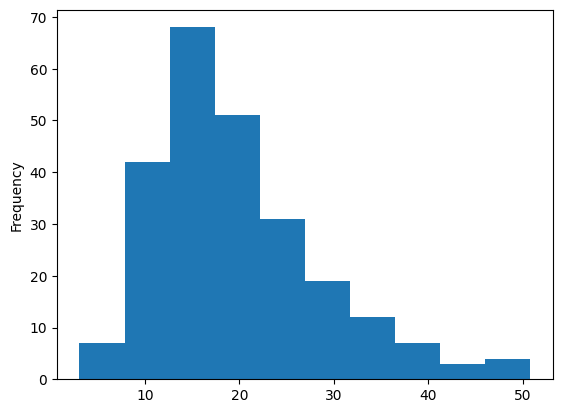

In [25]:
df['total_bill'].plot(kind='hist')

<Axes: xlabel='sex'>

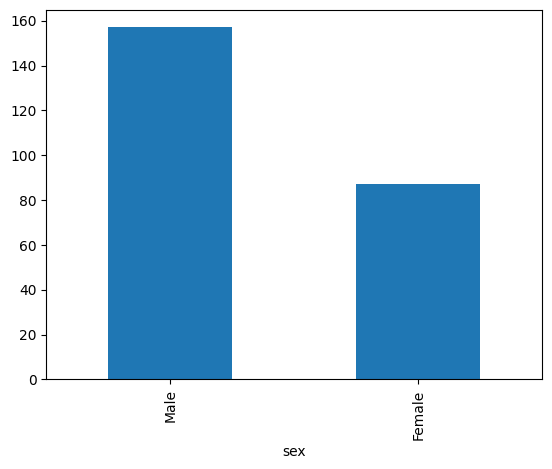

In [26]:
df['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

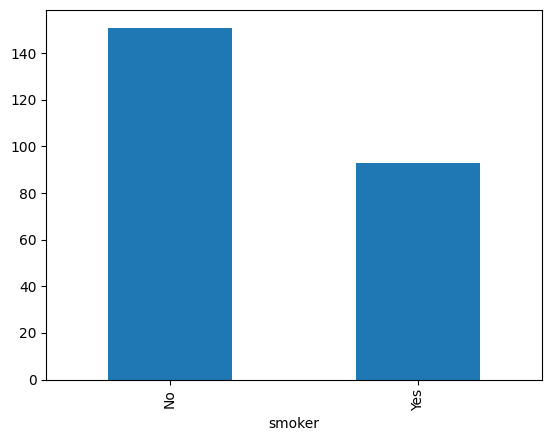

In [27]:
df['smoker'].value_counts().plot(kind='bar')

<Axes: xlabel='day'>

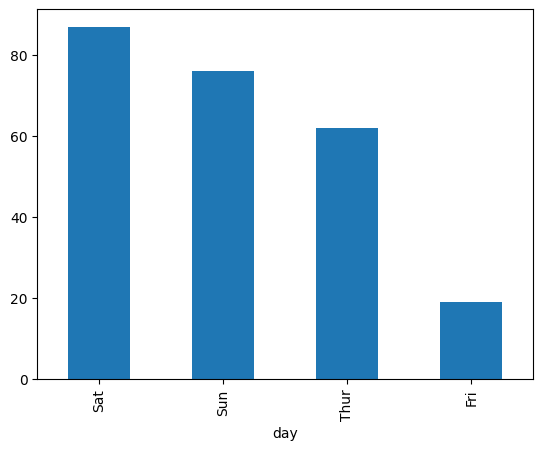

In [28]:
df['day'].value_counts().plot(kind="bar")

<Axes: xlabel='time'>

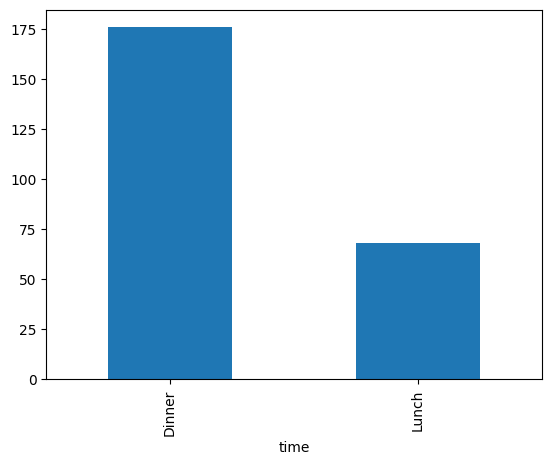

In [29]:
df['time'].value_counts().plot(kind="bar")

<Axes: xlabel='size'>

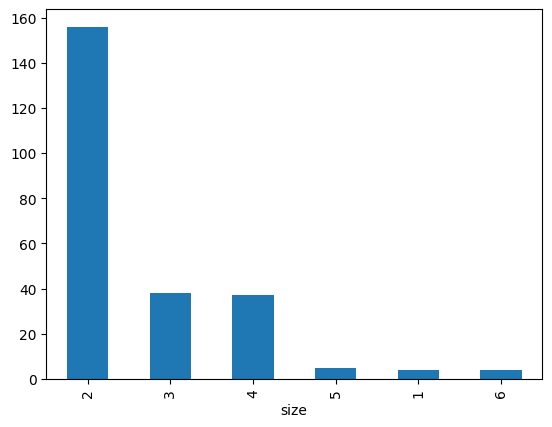

In [30]:
df['size'].value_counts().plot(kind="bar")

<function matplotlib.pyplot.show(close=None, block=None)>

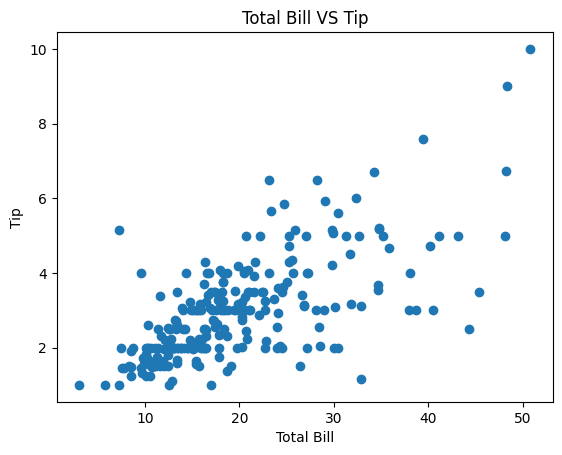

In [31]:
plt.title("Total Bill VS Tip")
plt.scatter(df['total_bill'],df['tip'])

plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show

/tmp/ipykernel_47/1008486341.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['total_bill'].mean().plot(kind='bar')


<Axes: xlabel='sex'>

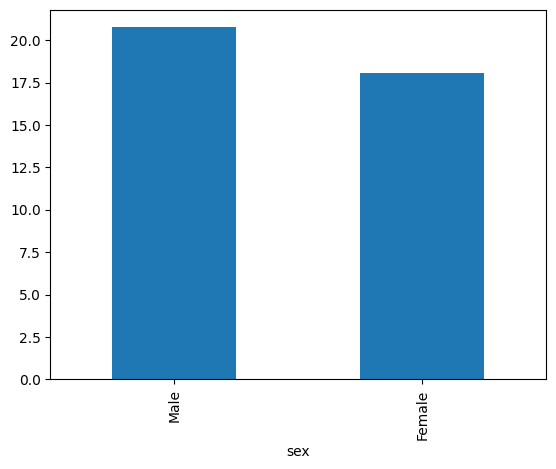

In [32]:
df.groupby('sex')['total_bill'].mean().plot(kind='bar')

<Axes: xlabel='total_bill', ylabel='tip'>

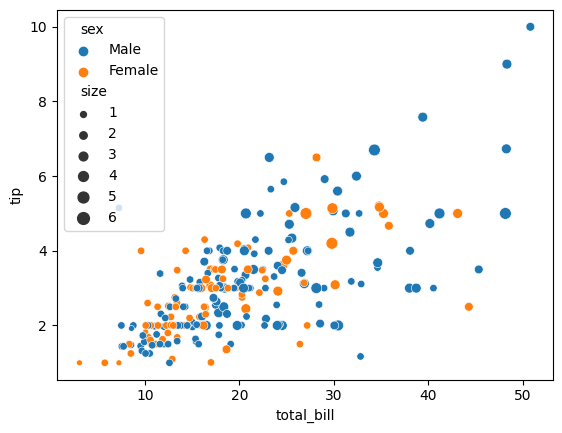

In [33]:
sns.scatterplot(data=df, x='total_bill', y='tip', size='size', hue='sex')

<Axes: xlabel='total_bill', ylabel='tip'>

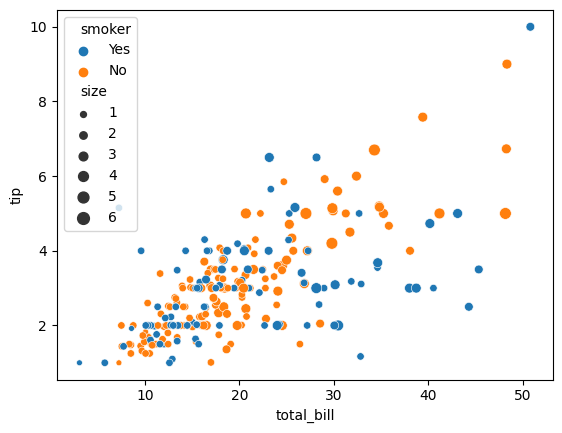

In [34]:
sns.scatterplot(data=df, x='total_bill', y='tip', size='size', hue='smoker')

<Axes: xlabel='total_bill', ylabel='tip'>

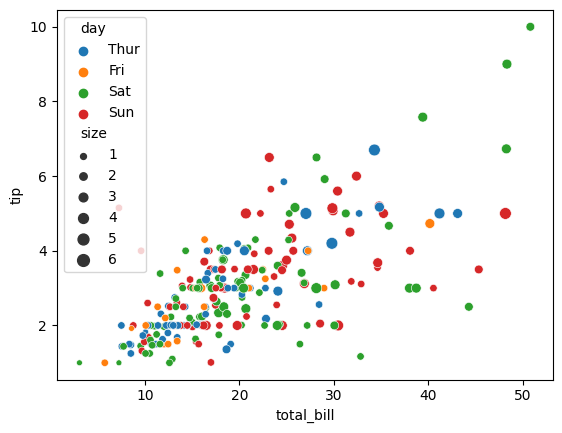

In [35]:
sns.scatterplot(data=df, x='total_bill', y='tip', size='size', hue='day')

<Axes: xlabel='total_bill', ylabel='tip'>

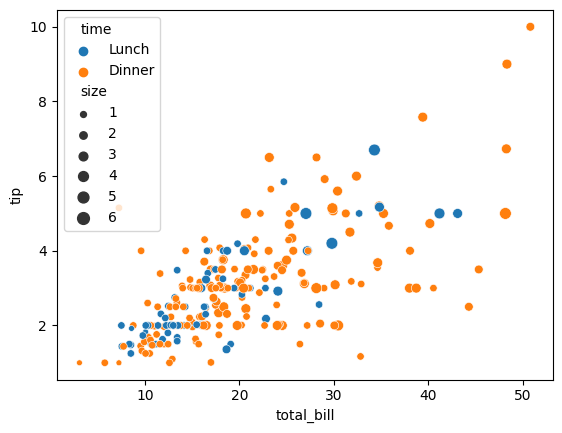

In [36]:
sns.scatterplot(data=df, x='total_bill', y='tip', size='size', hue='time')

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [38]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time',], drop_first=True)

In [39]:
y = df['tip']
X = df.drop( 'tip', axis=1)

In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [42]:
model = LinearRegression()

In [43]:
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)

In [45]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("MAE is:",mae)
print("MSE is:",mse)
print("R2 Score is:",r2)

MAE is: 0.7223918142415081
MSE is: 1.0201442686405406
R2 Score is: 0.46146772462221675
